In [2]:
#Are younger or older Gen-Z users more active on dating apps? 

#Younger GenZ users are more active on dating apps with an average daily usage of 1.65 hours as observed on Relationship Analysis


In [32]:
# Do metro city users behave differently from users in smaller towns? 
#There is not data on smaller town so there can't be any comparison

In [34]:
# Does dating app preference change over time? See below please

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data = pd.read_csv('GenZ_DatingApp_Data.csv')

In [10]:
# Load dataset
file_path = "GenZ_DatingApp_Data.csv"  # Update path if needed
data = pd.read_csv('GenZ_DatingApp_Data.csv')

# Check if 'Age' column exists
if 'Age' in data.columns:
    # Define age bins and labels
    age_bins = [18, 22, 26, 30]  
    age_labels = ['18-21', '22-25', '26-29']  # Updated labels for clarity

    # Create age groups
    data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

    print(data[['Age', 'Age_Group']].head())  # Preview the grouped data
else:
    print("Warning: 'Age' column not found in dataset.")

   Age Age_Group
0   20     18-21
1   24     22-25
2   24     22-25
3   22     22-25
4   18     18-21


In [12]:
# Check if required columns exist
if {'Age_Group', 'Primary_App'}.issubset(data.columns):
    # Group by 'Age_Group' and 'Primary_App', count occurrences, and pivot table
    over_time = (
        data.groupby(['Age_Group', 'Primary_App'], observed=True)
        .size()
        .unstack(fill_value=0)  # Fill missing values with 0
        .astype(int)  # Ensure counts are integers
        .sort_index()  # Sort by 'Age_Group' for readability
    )

    print(over_time)  # Preview the results
else:
    print("Warning: One or more required columns ('Age_Group', 'Primary_App') are missing from the dataset.")

Primary_App  Bumble  Hinge  OkCupid  Tinder
Age_Group                                  
18-21            50     43       59      33
22-25            43     63       59      43


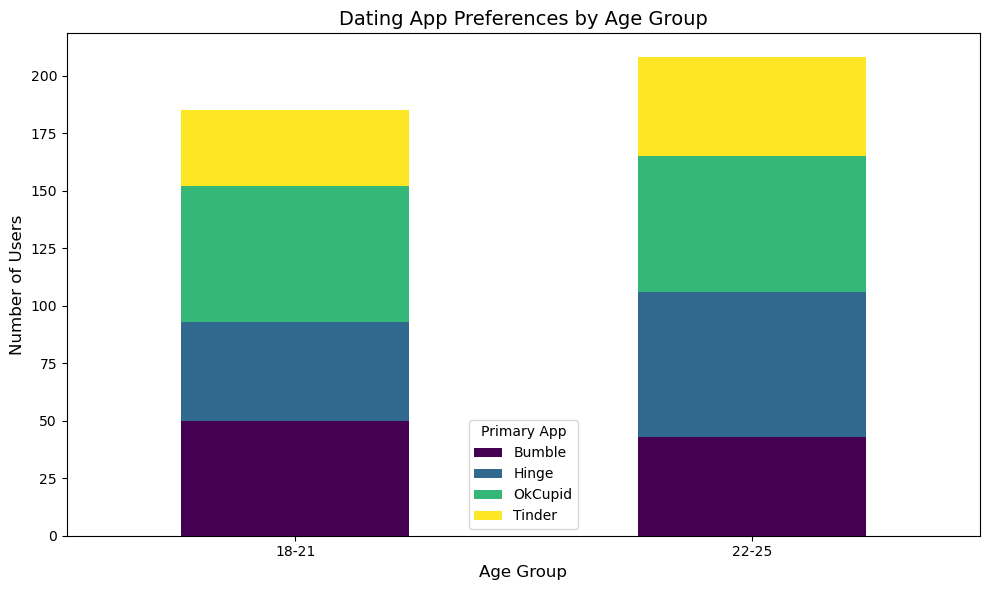

In [14]:
import matplotlib.pyplot as plt

# Check if 'over_time' DataFrame is not empty
if not over_time.empty:
    # Plot the stacked bar chart
    ax = over_time.plot(
        kind='bar', stacked=True, figsize=(10, 6), 
        colormap='viridis'  # Improved color scheme
    )
    
    # Add title and labels
    plt.title('Dating App Preferences by Age Group', fontsize=14)
    plt.xlabel('Age Group', fontsize=12)
    plt.ylabel('Number of Users', fontsize=12)
    
    # Format y-axis with thousands separator for readability
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    
    # Improve legend
    plt.legend(title='Primary App', fontsize=10)
    
    # Optimize layout
    plt.xticks(rotation=0)  # Keep x-axis labels horizontal for readability
    plt.tight_layout()

    # Show plot
    plt.show()
else:
    print("Warning: 'over_time' DataFrame is empty. Check data processing steps.")

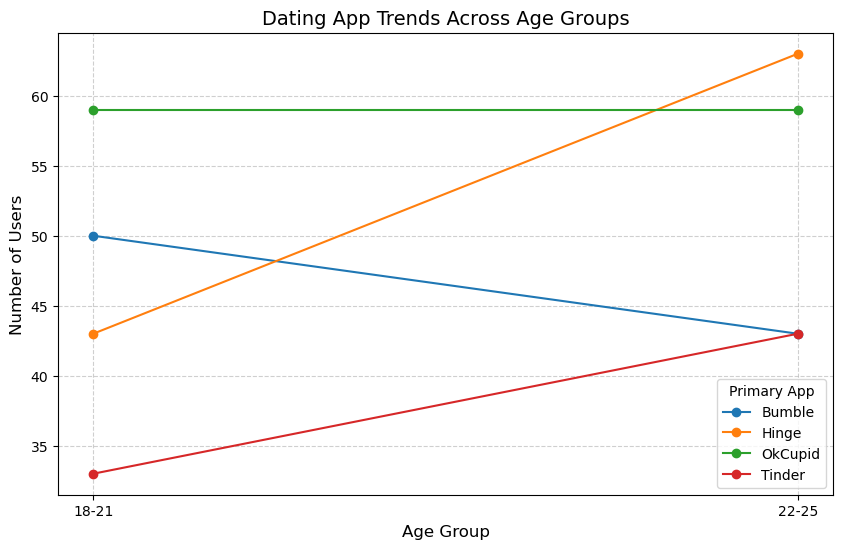

In [16]:
import matplotlib.pyplot as plt

# Ensure 'over_time' is not empty
if not over_time.empty:
    plt.figure(figsize=(10, 6))

    # Convert index to string to ensure proper plotting
    over_time.index = over_time.index.astype(str)

    # Loop through each app and plot its trend
    for app in over_time.columns:
        plt.plot(over_time.index, over_time[app], marker='o', linestyle='-', label=app)

    # Titles and labels
    plt.title('Dating App Trends Across Age Groups', fontsize=14)
    plt.xlabel('Age Group', fontsize=12)
    plt.ylabel('Number of Users', fontsize=12)

    # Enhance readability
    plt.xticks(rotation=0)  # Keep labels horizontal
    plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for readability
    plt.legend(title='Primary App', fontsize=10)
    
    # Show plot
    plt.show()
else:
    print("Warning: 'over_time' DataFrame is empty. Check data processing steps.")


C:\Users\lione\AppData\Local\Temp\ipykernel_15108\1690912261.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_usage, x='Location', y='User_Count', palette='Reds')


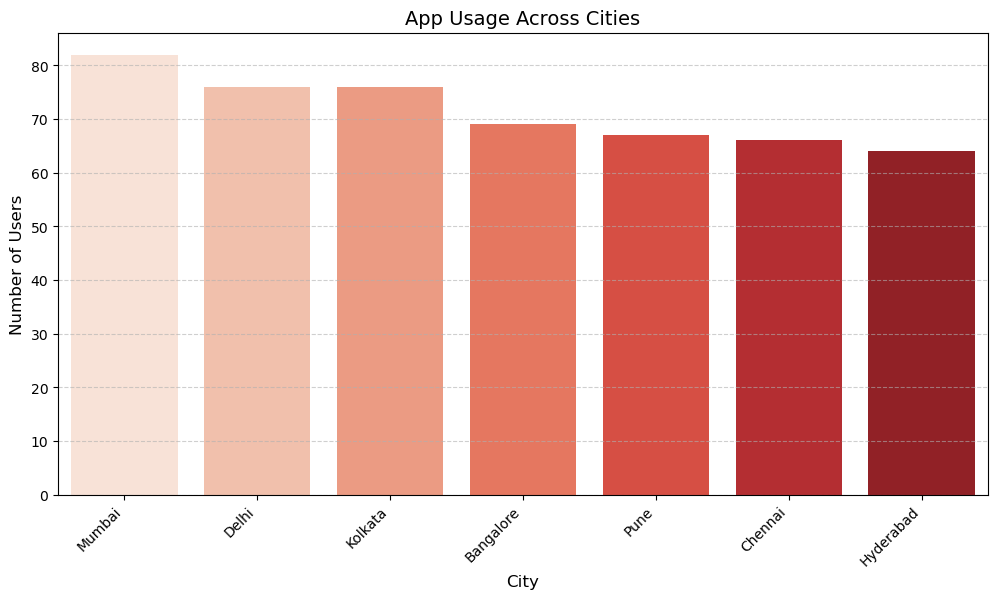

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by location (city) and count users
city_usage = data.groupby('Location').size().reset_index(name='User_Count')

# Ensure 'city_usage' is not empty before plotting
if not city_usage.empty:
    # Sort cities by user count (descending)
    city_usage = city_usage.sort_values(by='User_Count', ascending=False)

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(data=city_usage, x='Location', y='User_Count', palette='Reds')

    # Titles and labels
    plt.title('App Usage Across Cities', fontsize=14)
    plt.xlabel('City', fontsize=12)
    plt.ylabel('Number of Users', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Add grid for better visualization
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Show plot
    plt.show()
else:
    print("Warning: 'city_usage' DataFrame is empty. Check data processing steps.")


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Dataset loaded successfully!
Columns in dataset: Index(['User_ID', 'Age', 'Gender', 'Location', 'Education', 'Occupation',
       'Primary_App', 'Secondary_Apps', 'Usage_Frequency', 'Daily_Usage_Time',
       'Reason_for_Using', 'Satisfaction', 'Challenges', 'Desired_Features',
       'Preferred_Communication', 'Partner_Priorities'],
      dtype='object')


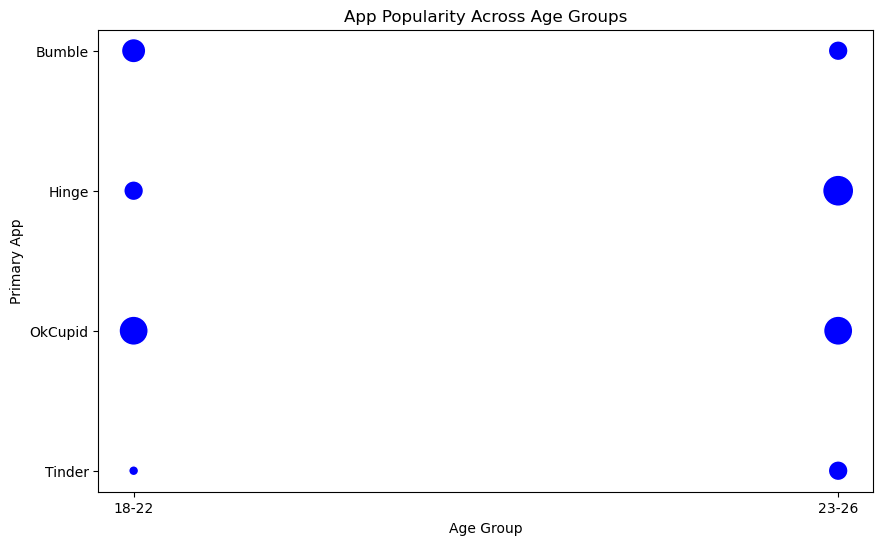

In [30]:
# Load the dataset (Ensure the file exists in your directory)
file_path = "GenZ_DatingApp_Data.csv"

try:
    data = pd.read_csv('GenZ_DatingApp_Data.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{'GenZ_DatingApp_Data.csv'}' was not found. Please check the file path.")
    exit()

# Print column names to check for errors
print("Columns in dataset:", data.columns)

# Remove leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Check if 'Age' column exists to create 'Age_Group'
if 'Age' not in data.columns:
    print("Error: 'Age' column not found in dataset.")
    exit()

# Create 'Age_Group' column
age_bins = [18, 22, 26, 30]
age_labels = ['18-22', '23-26', '27-30']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Check if 'Primary_App' column exists
if 'Primary_App' not in data.columns:
    print("Error: 'Primary_App' column not found in dataset.")
    exit()

# Grouping data: Count users per (Age_Group, Primary_App)
age_app_popularity = data.groupby(['Age_Group', 'Primary_App'], observed=True).size().reset_index(name='User_Count')

# Check if data is empty
if age_app_popularity.empty:
    print("Warning: No data available for plotting.")
else:
    # Plot the bubble chart
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=age_app_popularity, x='Age_Group', y='Primary_App',
                    size='User_Count', sizes=(50, 500), legend=False, color='blue')
    
    # Titles and labels
    plt.title('App Popularity Across Age Groups')
    plt.xlabel('Age Group')
    plt.ylabel('Primary App')
    
    # Show the plot
    plt.show()